In [99]:
import pandas as pd

In [100]:
pima = pd.read_csv("diabetes.csv")
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [101]:
pima.size

6912

In [102]:
pima.shape

(768, 9)

In [103]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin','BloodPressure', 'BMI', 'Age','Glucose','DiabetesPedigreeFunction']
X = pima[feature_cols] # Features
y = pima.Outcome # Target variable

In [104]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [105]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=0)

In [106]:
# print the shape of 'x_train'
print("X_train ",X_train.shape)

# print the shape of 'x_test'
print("X_test ",X_test.shape)

# print the shape of 'y_train'
print("y_train ",y_train.shape)

# print the shape of 'y_test'
print("y_test ",y_test.shape)

X_train  (576, 7)
X_test  (192, 7)
y_train  (576,)
y_test  (192,)


In [118]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver = 'newton-cg',penalty = 'l2')

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)
y_train_pred=logreg.predict(X_train)

In [119]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7638888888888888
Accuracy: 0.8072916666666666


In [109]:
# model_score=logreg.score(X_test,y_test)

In [110]:
# import the metrics class
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[118,  12],
       [ 25,  37]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

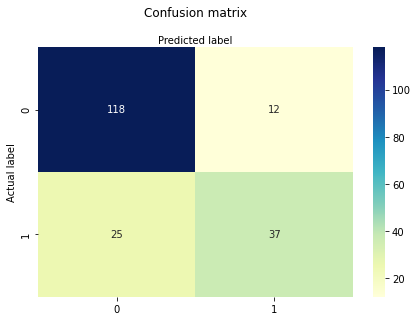

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [112]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8072916666666666
Precision: 0.7551020408163265
Recall: 0.5967741935483871


In [113]:
# accuracy measures by classification_report()
result = metrics.classification_report(y_test,y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.83      0.91      0.86       130
           1       0.76      0.60      0.67        62

    accuracy                           0.81       192
   macro avg       0.79      0.75      0.77       192
weighted avg       0.80      0.81      0.80       192



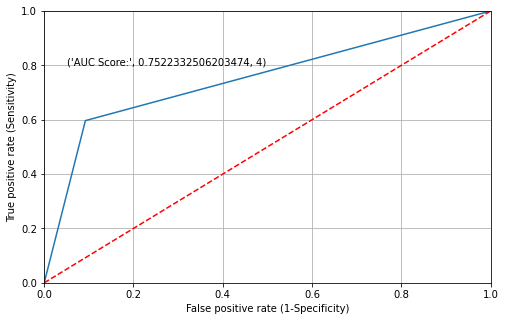

In [114]:
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', metrics.roc_auc_score(y_test, y_pred),4))

# name the plot, and both axes
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

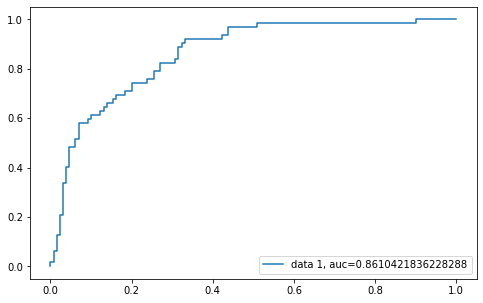

In [115]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()